In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from ot_dis.wtk.utilities import get_ucr_dataset, krein_svm_grid_search
from ot_dis.wtk import transform_to_dist_matrix, get_kernel_matrix, wtk_distance
import numpy as np
import os
from getData import getData
from knn import knn_OTW
import time
from ot.lp import emd_1d_sorted
import numpy as np
import torch

DEBUG:matplotlib:matplotlib data path: c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:CONFIGDIR=C:\Users\Administrator\.matplotlib
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:CACHEDIR=C:\Users\Administrator\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Administrator\.matplotlib\fontlist-v330.json


In [3]:
import torch
import numpy as np
from getData import getData
from ot_dis.kpg import kpg_sequence_distance, kpg_1d_distance, kpg_2d_rl_kp
from knn import knn_sequence_KPG
from arabic_load import get_train_data, get_test_data
from ot_dis.wtk import wtk_distance

# 1. Load data

In [4]:
X_train, y_train, X_test, y_test = getData('BME', '../data/UCR/raw_data/')
xs, xt = X_train[8], X_test[9]

In [5]:
len(X_train), len(X_test), X_train[0].shape

(30, 150, (128,))

In [6]:
X_train_arabic, y_train_arabic = get_train_data()
X_test_arabic, y_test_arabic = get_test_data()
xs_arabic, xt_arabic = X_train_arabic[0], X_test_arabic[1210]

In [7]:
xs_arabic.shape, xt_arabic.shape

((38, 13), (7, 13))

# 2. Metrics proposal

## 2.1. WTK

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\Documents\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\Documents\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\cmtt10.ttf', name='cmtt10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\

(0.3139994144439697, 0.3253678601524448)

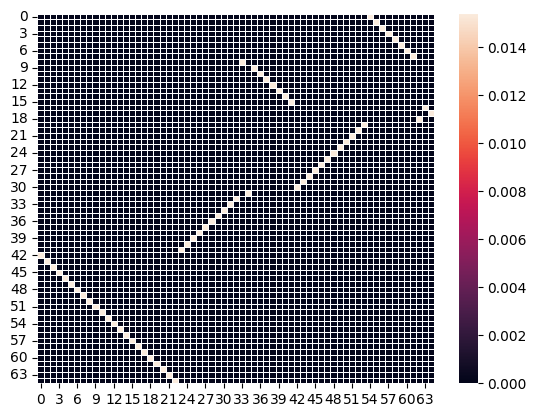

In [6]:
start_time = time.time()
pi_wtk, cost_wtk = wtk_distance(xs, xt, 64, plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

## 2.2. KPG

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='c:\\Users\\Administrator\\Documents\\WTK-distance\\venv\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSerif-Italic.ttf

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\trebucbd.ttf', name='Trebuchet MS', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\constanb.ttf', name='Constantia', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\ariblk.ttf', name='Arial', style='normal', variant='normal', weight=900, stretch='normal', size='scalable')) = 6.888636363636364
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\malgun.ttf', name='Malgun Gothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\CALISTBI.TTF', name='Calisto MT', style='italic', variant='normal', weight=700,

(0.23599886894226074, 0.9514490254375252)

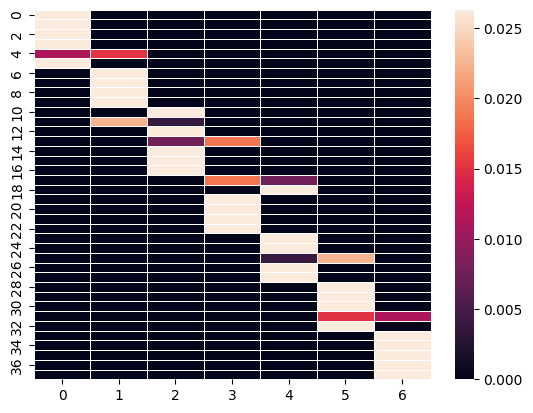

In [10]:
start_time = time.time()
pi_wtk, cost_wtk = kpg_2d_rl_kp(xs_arabic, xt_arabic, lamb=6,plot=True)
end_time = time.time()
end_time - start_time, cost_wtk

## 2.3 KPG_Sequence

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000178D71F5810>


(0.11700010299682617, 0.9401192337801052)

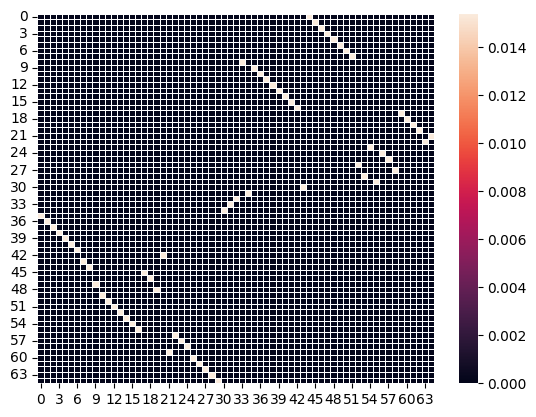

In [35]:
sub_length = 64
lamb = 45
start_time = time.time()
pi_kpg_sequence, cost_kpg_sequence = kpg_sequence_distance(a=xs, b=xt, plot=True, lamb=lamb, sub_length=sub_length)
end_time = time.time()
end_time - start_time, cost_kpg_sequence

## 2.4. KPG partial

In [27]:
import seaborn as sns
from ot_dis.kpg import linearprog
def create_mask(C, k):
    n, m = C.shape
    M = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            if (i > j*n/m - k) & (i < j*n/m + k):
                M[i][j]=1 
    return M

In [22]:
def cost_matrix(x, y):
    x, y = torch.Tensor(x), torch.Tensor(y)
    Cxy = x.pow(2).sum(dim=1).unsqueeze(1) + y.pow(2).sum(dim=1).unsqueeze(0) - 2 * torch.matmul(x, y.t())
    #Cxy = np.expand_dims((x**2).sum(axis=1),1) + np.expand_dims((y**2).sum(axis=1),0) - 2 * x@y.T
    return Cxy

In [23]:
lamb = 5
eps = 1e-10
p = torch.Tensor(np.ones(len(xs_arabic))/len(xs_arabic))
q = torch.Tensor(np.ones(len(xt_arabic))/len(xt_arabic))
C = cost_matrix(xs_arabic, xt_arabic)
C /= (C.max() + eps)
## mask matrix
M = torch.Tensor(create_mask(C, lamb))

In [25]:
A = C.max()
xi = 1e2*C.max()
C_ = torch.cat((C, xi * torch.ones(C.size(0), 1)), dim=1)
C_ = torch.cat((C_, xi * torch.ones(1, C_.size(1))), dim=0)
C_[-1, -1] = 2 * xi + A

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000178D6113A90>


<Axes: >

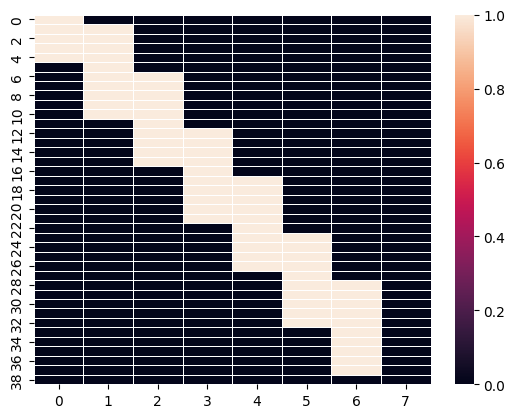

In [31]:
s=0.5
p_ = torch.cat((p, (torch.sum(q) - s) * torch.Tensor([1])))
q_ = torch.cat((q, (torch.sum(p) - s) * torch.Tensor([1])))
a = torch.zeros(M.shape[0], 1, dtype=torch.int64)
b = torch.zeros(M.shape[1] + 1, 1, dtype=torch.int64)
M_ = torch.cat((M, a), dim=1)
M_ = torch.cat((M_, b.t()), dim=0)
sns.heatmap(M_, linewidth=0.5)

In [32]:
M_.shape, p_.shape, q_.shape, C_.shape

(torch.Size([39, 8]), torch.Size([39]), torch.Size([8]), torch.Size([39, 8]))

In [33]:
pi_ = linearprog.lp(p_.numpy(), q_.numpy(), C_.numpy(), M_.numpy())

c:\Users\Administrator\Documents\WTK-distance\venv\Lib\site-packages\cvxpy\reductions\solvers\solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


ValueError: cannot reshape array of size 1 into shape (8,39)

## 2.5. KPG 1D

In [12]:
import numpy as np
from scipy.sparse import coo_matrix
from ot_dis.kpg import linearprog

p = np.ones(len(xs))/len(xs)
q = np.ones(len(xt))/len(xt)

x_a_1d = np.reshape(xs, (-1,))
x_b_1d = np.reshape(xt, (-1,))
perm_a = np.argsort(x_a_1d)
perm_b = np.argsort(x_b_1d)

G_sorted, indices, cost = emd_1d_sorted(
    np.array(p[perm_a]).astype(np.float64),
    np.array(q[perm_b]).astype(np.float64),
    np.array(x_a_1d[perm_a]).astype(np.float64),
    np.array(x_b_1d[perm_b]).astype(np.float64),
    metric='sqeuclidean', p=1.
)
G_sorted
# indices = [i for i in range(len(G_sorted))]
# G = coo_matrix((G_sorted, (indices, indices)), shape=(len(G_sorted), len(G_sorted)))
# eps=1e-10
# gamma=0.1
# lamb = 20
# G /= (G.max() + eps)
# n, m = G.shape
# M = create_mask(G, lamb)
# pi = linearprog.lp(p,q,G,M)
# D = G.numpy()
# cost = np.sum(pi * D)
# cost = np.exp(-gamma * cost)


array([0.0078125, 0.       , 0.0078125, 0.       , 0.0078125, 0.       ,
       0.0078125, 0.       , 0.0078125, 0.       , 0.0078125, 0.       ,
       0.0078125, 0.       , 0.0078125, 0.       , 0.0078125, 0.       ,
       0.0078125, 0.       , 0.0078125, 0.       , 0.0078125, 0.       ,
       0.0078125, 0.       , 0.0078125, 0.       , 0.0078125, 0.       ,
       0.0078125, 0.       , 0.0078125, 0.       , 0.0078125, 0.       ,
       0.0078125, 0.       , 0.0078125, 0.       , 0.0078125, 0.       ,
       0.0078125, 0.       , 0.0078125, 0.       , 0.0078125, 0.       ,
       0.0078125, 0.       , 0.0078125, 0.       , 0.0078125, 0.       ,
       0.0078125, 0.       , 0.0078125, 0.       , 0.0078125, 0.       ,
       0.0078125, 0.       , 0.0078125, 0.       , 0.0078125, 0.       ,
       0.0078125, 0.       , 0.0078125, 0.       , 0.0078125, 0.       ,
       0.0078125, 0.       , 0.0078125, 0.       , 0.0078125, 0.       ,
       0.0078125, 0.       , 0.0078125, 0.       , 

In [40]:
import numpy as np
from scipy.sparse import coo_matrix

# Example data
data = np.array([1, 2, 3, 4])
indices = [i for i in range(len(data))]


# Create a coo_matrix
my_coo_matrix = coo_matrix((data, (indices, indices)), shape=(4, 4))
my_coo_matrix.toarray(), type(data), len(data), data.shape, indices
# Now, my_coo_matrix is a sparse matrix in COO format


(array([[1, 0, 0, 0],
        [0, 2, 0, 0],
        [0, 0, 3, 0],
        [0, 0, 0, 4]]),
 numpy.ndarray,
 4,
 (4,),
 [0, 1, 2, 3])

# Test

In [10]:
# -*- coding: utf-8 -*-
"""
======================================
Optimal Transport for 1D distributions
======================================

This example illustrates the computation of EMD and Sinkhorn transport plans
and their visualization.

"""

# Author: Remi Flamary <remi.flamary@unice.fr>
#
# License: MIT License
# sphinx_gallery_thumbnail_number = 3

import numpy as np
import matplotlib.pylab as pl
import ot
import ot.plot
from ot.datasets import make_1D_gauss as gauss

##############################################################################
# Generate data
# -------------


#%% parameters

n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = gauss(n, m=20, s=5)  # m= mean, s= std
b = gauss(n, m=60, s=10)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()


##############################################################################
# Plot distributions and loss matrix
# ----------------------------------

#%% plot the distributions

# pl.figure(1, figsize=(6.4, 3))
# pl.plot(x, a, 'b', label='Source distribution')
# pl.plot(x, b, 'r', label='Target distribution')
# pl.legend()

#%% plot distributions and loss matrix

#pl.figure(2, figsize=(5, 5))
#ot.plot.plot1D_mat(a, b, M, 'Cost matrix M')

##############################################################################
# Solve EMD
# ---------


#%% EMD

# use fast 1D solver
G0 = ot.emd_1d(x, x, a, b)

# Equivalent to
# G0 = ot.emd(a, b, M)

#pl.figure(3, figsize=(5, 5))
#ot.plot.plot1D_mat(a, b, G0, 'OT matrix G0')

##############################################################################
# Solve Sinkhorn
# --------------


#%% Sinkhorn

lambd = 1e-3
Gs = ot.sinkhorn(a, b, M, lambd, verbose=True)

#pl.figure(4, figsize=(5, 5))
#ot.plot.plot1D_mat(a, b, Gs, 'OT matrix Sinkhorn')

#pl.show()

It.  |Err         
-------------------
    0|2.861463e-01|
   10|1.860154e-01|
   20|8.144529e-02|
   30|3.130143e-02|
   40|1.178815e-02|
   50|4.426078e-03|
   60|1.661047e-03|
   70|6.233110e-04|
   80|2.338932e-04|
   90|8.776627e-05|
  100|3.293340e-05|
  110|1.235791e-05|
  120|4.637176e-06|
  130|1.740051e-06|
  140|6.529356e-07|
  150|2.450071e-07|
  160|9.193632e-08|
  170|3.449812e-08|
  180|1.294505e-08|
  190|4.857493e-09|
It.  |Err         
-------------------
  200|1.822723e-09|


In [11]:
x_a_1d = np.reshape(a, (-1,))
x_b_1d = np.reshape(b, (-1,))
perm_a = np.argsort(x_a_1d)
perm_b = np.argsort(x_b_1d)

In [14]:
x_a_1d.shape

(100,)

# 3. Visualize distance matrix difference

In [13]:
import seaborn as sns
def plot_difference(C1, C2):
    C = C1-C2
    sns.heatmap(C, linewidth=0.5)

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000020C081553D0>


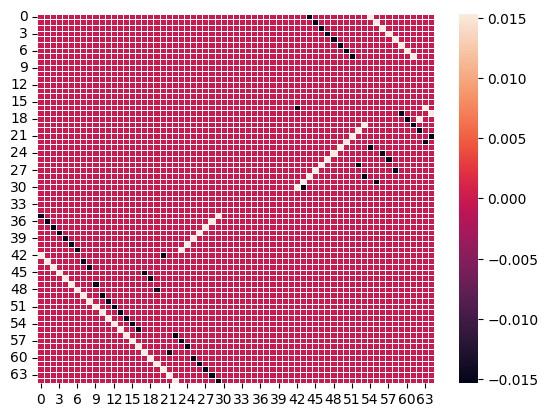

In [16]:
plot_difference(pi_wtk, pi_kpg_sequence)